# 6. Tables


## 6.3. Example: Population Trends

In [16]:
from datascience import *
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_df = pd.read_csv(data)
full_census_df

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
2,0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
3,0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
4,0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54165,57123,59221,60670,62407,68608,69709,76276,82100,84358
302,2,98,36641,36675,37567,40078,42561,43866,45887,46611,52122,52978,57593,62607
303,2,99,26193,26214,26098,26995,29076,30672,32245,33560,34278,38489,39576,42528
304,2,100,44202,44246,45080,47427,50040,52817,57108,60309,64381,67113,72153,76850


The *SEX* column contains numeric codes: 0 stands for the total, 1 for male, and 2 for female.
The *AGE* column contains ages in completed years, but the special value **999** is a **sum of the total population**.
The age **100** includes **all people aged 100 or more**.

Suppose we are only interested in the population changes from 2014 to 2019. 

Let's select the relevant columns


In [4]:
partial_census_df = full_census_df[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
partial_census_df

,SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


Siplify the labels of the selected columns.

In [7]:
us_pop = partial_census_df.rename(columns = {'POPESTIMATE2014':'2014','POPESTIMATE2019':'2019'})
us_pop

,SEX,AGE,2014,2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


### 6.3.1. Ages 97-100

Let's examine the total population, labeled by SEX code 0. Since all there rows will have the same value 0 in the SEX column, we will drop that column.

In [9]:
us_pop_by_age = us_pop[us_pop['SEX'] == 0].drop(['SEX'], axis=1)
us_pop_by_age

,AGE,2014,2019
0,0,3954787,3783052
1,1,3948891,3829599
2,2,3958711,3922044
3,3,4005928,3998665
4,4,4004032,4043323
...,...,...,...
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


Now let's look at the population in the highest ages.

In [13]:
us_pop_by_age[ (97 <= us_pop_by_age['AGE']) & (us_pop_by_age['AGE'] < 101) ]

,AGE,2014,2019
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


### 6.3.2. Percent Change
Each column of the table us_pop_by_age is an array of the same length, and so columns can be combined using arithmetic. 
Let's calculate changes for each age (row) in population between 2013 and 2019.

In [15]:
change = us_pop_by_age['2019'] - us_pop_by_age['2014']

We can augment us_pop_by_age with a column that contains there changes, both in absolute terms and as percents relative to the value in 2014.

In [41]:
ratio = change/us_pop_by_age['2014']
percent = np.array("{:.2%}".format(val) for val in ratio)

us_pop_change = us_pop_by_age.copy()
us_pop_change.loc[:, 'Change'] = change
us_pop_change.loc[:, 'Percent Change'] = percent
us_pop_change

,AGE,2014,2019,Change,Percent Change
0,0,3954787,3783052,-171735,-4.34%
1,1,3948891,3829599,-119292,-3.02%
2,2,3958711,3922044,-36667,-0.93%
3,3,4005928,3998665,-7263,-0.18%
4,4,4004032,4043323,39291,0.98%
...,...,...,...,...,...
97,97,82948,116969,34021,41.01%
98,98,59546,86150,26604,44.68%
99,99,41277,57124,15847,38.39%
100,100,70685,100322,29637,41.93%


Sort the table in decreasing order of the absolute change in population. 

In [42]:
us_pop_change[us_pop_change['AGE'] < 999].sort_values(by = ['Change'], axis=0, ascending=False)

,AGE,2014,2019,Change,Percent Change
72,72,2191642,3191048,999406,45.60%
68,68,2567511,3345475,777964,30.30%
69,69,2530460,3252423,721963,28.53%
70,70,2461426,3136704,675278,27.43%
71,71,2516392,3083083,566691,22.52%
...,...,...,...,...,...
44,44,4375450,3967275,-408175,-9.33%
53,53,4523245,4068851,-454394,-10.05%
43,43,4319265,3854040,-465225,-10.77%
52,52,4467724,4001782,-465942,-10.43%


## 6.4. Example: Sex Ratios

In this section, we will continue using the us_pop table from the previous section but with a focus on population trends in relation to the SEX column.



### 6.4.1. The Code Used in the SEX Column
* 0: total 
* 1: male
* 2: female



### 6.4.2. Overall Proportions

In [43]:
us_pop_2019 = us_pop.drop(['2014'], axis=1)
all_ages = us_pop_2019[us_pop_2019['AGE'] == 999]
all_ages

,SEX,AGE,2019
101,0,999,328239523
203,1,999,161657324
305,2,999,166582199


### 6.4.3. Proportions Among Infants

In [44]:
infants = us_pop_2019[us_pop_2019['AGE'] == 0]
infants

,SEX,AGE,2019
0,0,0,3783052
102,1,0,1935117
204,2,0,1847935


Add Proportion column that contains the percent ratio of each gender.

In [45]:
infants_2019 = infants['2019'][0]

ratio = infants['2019']/infants_2019
percent = np.array(["{:.2%}".format(val) for val in ratio])
infants.loc[:, 'Proportion'] = percent
infants

<ipython-input-45-37d795347ad8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infants.loc[:, 'Proportion'] = percent


,SEX,AGE,2019,Proportion
0,0,0,3783052,100.00%
102,1,0,1935117,51.15%
204,2,0,1847935,48.85%


### 6.4.4. Sex Ratio at Each Age

In [56]:
females_all_rows = us_pop_2019[us_pop_2019['SEX'] == 2]
females = females_all_rows[females_all_rows['AGE'] != 999]
males_all_rows = us_pop_2019[us_pop_2019['SEX'] == 1]
males = males_all_rows[males_all_rows['AGE'] != 999]

females = females.reset_index()
males = males.reset_index()

ratios = pd.DataFrame({'AGE': females['AGE'], '2019 F:M RATIO': females['2019']/males['2019']})
ratios

,AGE,2019 F:M RATIO
0,0,0.954947
1,1,0.955289
2,2,0.955601
3,3,0.957242
4,4,0.956177
...,...,...
96,96,2.419689
97,97,2.586796
98,98,2.659262
99,99,2.913675


make a plot for the F:M ratio.

<Axes: xlabel='AGE'>

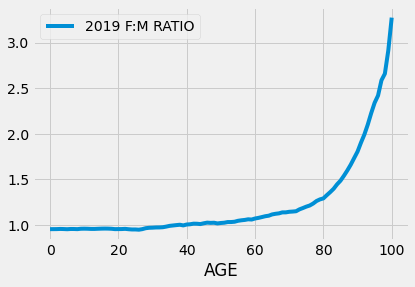

In [57]:
ratios.plot('AGE')